**CUSTOMER_ANALYSIS**

*Demographic Distribution*

In [2]:
from datetime import datetime
import pandas as pd
full_data = pd.read_csv(r"C:\Users\navee\OneDrive\Desktop\DATA_SPARK(project-2)\full_data")

In [3]:
gender_dist = full_data.groupby('Gender')['CustomerKey'].nunique().reset_index()
gender_dist.rename(columns={'CustomerKey': 'Customer Count'}, inplace=True)

In [4]:
print(gender_dist)

   Gender  Customer Count
0  Female            5858
1    Male            6029


In [5]:
age_dist = full_data['Age'].describe()

In [6]:
print(age_dist)

count    62884.000000
mean        55.366039
std         19.410219
min         22.000000
25%         39.000000
50%         55.000000
75%         72.000000
max         89.000000
Name: Age, dtype: float64


In [8]:
location_dist = full_data.groupby(['City', 'State_x', 'Country_x', 'Continent'])['CustomerKey'].nunique().reset_index()
location_dist.rename(columns={'CustomerKey': 'Customer Count'}, inplace=True)

In [9]:
print(location_dist)

                 City            State_x       Country_x Continent  \
0             A'CHILL           Highland  United Kingdom    Europe   
1      ABBOTSKERSWELL        Teignbridge  United Kingdom    Europe   
2               ABDON         Shropshire  United Kingdom    Europe   
3            ABERAMAN  Rhondda Cynon Taf  United Kingdom    Europe   
4            ABERERCH            Gwynedd  United Kingdom    Europe   
...               ...                ...             ...       ...   
7009  s-Hertogenbosch      Noord-Brabant     Netherlands    Europe   
7010       ÉCHIROLLES        Rhône-Alpes          France    Europe   
7011        ÉLANCOURT      Île-de-France          France    Europe   
7012          ÉPERNAY  Champagne-Ardenne          France    Europe   
7013           ÉVREUX    Haute-Normandie          France    Europe   

      Customer Count  
0                  1  
1                  1  
2                  1  
3                  1  
4                  1  
...              ... 

*Purchase Patterns*

In [10]:
avg_order_value = full_data.groupby('CustomerKey')['Sales Amount'].mean().reset_index()
avg_order_value.rename(columns={'Sales Amount': 'Avg Order Value'}, inplace=True)

In [11]:
print(avg_order_value.head())

   CustomerKey  Avg Order Value
0          301         592.0000
1          325         578.7670
2          554         237.9275
3         1042         374.9700
4         1314         507.9720


In [36]:
purchase_frequency = full_data.groupby('CustomerKey')['Order Number'].nunique().reset_index()
purchase_frequency.rename(columns={'Order Number': 'Purchase Frequency'}, inplace=True)

In [78]:
print(purchase_frequency.head())

   CustomerKey  Purchase Frequency
0          301                   1
1          325                   3
2          554                   2
3         1042                   1
4         1314                   1


In [38]:
preferred_products = full_data.groupby('Product Name')['Quantity'].sum().reset_index()
preferred_products = preferred_products.sort_values(by='Quantity', ascending=False)

In [79]:
print(preferred_products.head())

                                    Product Name  Quantity
2381              WWI Desktop PC2.33 X2330 Black       550
2371              WWI Desktop PC1.80 E1800 White       538
243   Adventure Works Desktop PC2.30 MD230 White       521
228   Adventure Works Desktop PC1.60 ED160 Black       521
232   Adventure Works Desktop PC1.80 ED180 Black       520


*Customer Segmentation*

In [12]:
bins = [0, 18, 30, 50, 100]
labels = ['18 and below', '19-30', '31-50', '51 and above']
full_data['Age Group'] = pd.cut(full_data['Age'], bins=bins, labels=labels)

In [13]:
customer_segment = full_data.groupby('Age Group')['Sales Amount'].mean().reset_index()
customer_segment = full_data.groupby('Age Group', observed=True)['Sales Amount'].mean().reset_index()


C:\Users\navee\AppData\Local\Temp\ipykernel_15176\3876761993.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  customer_segment = full_data.groupby('Age Group')['Sales Amount'].mean().reset_index()


In [14]:
print(customer_segment)

      Age Group  Sales Amount
0         19-30    870.021946
1         31-50    897.024000
2  51 and above    885.041011


**SALES ANALYSIS**

*overall sales analysis*

In [82]:
print(full_data['Order Date'].dtype)


datetime64[ns]


In [48]:
full_data['Order Date'] = pd.to_datetime(full_data['Order Date'], errors='coerce')

In [83]:
full_data['Month'] = full_data['Order Date'].dt.to_period('M')
monthly_sales = full_data.groupby('Month')['Sales Amount'].sum().reset_index()

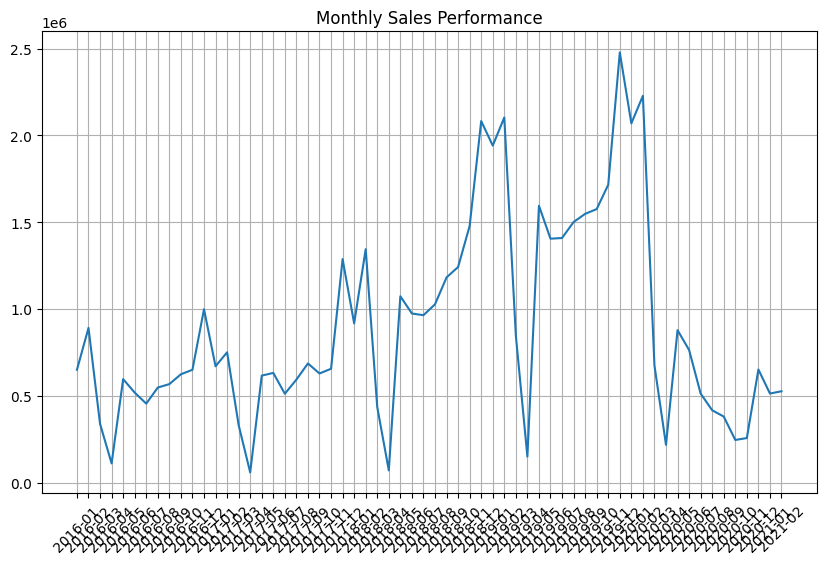

In [84]:
import matplotlib.pyplot as plt
monthly_sales['Month'] = monthly_sales['Month'].dt.strftime('%Y-%m')
plt.figure(figsize=(10, 6)) 
plt.plot(monthly_sales['Month'], monthly_sales['Sales Amount'])
plt.title('Monthly Sales Performance')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

*Sales by Product*

In [60]:
sales_by_product = full_data.groupby('Product Name').agg({'Quantity': 'sum', 'Sales Amount': 'sum'}).reset_index()
sales_by_product = sales_by_product.sort_values(by='Sales Amount', ascending=False)

In [85]:
print(sales_by_product.head())

                                     Product Name  Quantity  Sales Amount
2381               WWI Desktop PC2.33 X2330 Black       550      505450.0
246   Adventure Works Desktop PC2.33 XD233 Silver       481      466089.0
245    Adventure Works Desktop PC2.33 XD233 Brown       479      464151.0
244    Adventure Works Desktop PC2.33 XD233 Black       462      447678.0
247    Adventure Works Desktop PC2.33 XD233 White       451      437019.0


*Sales by Store*

In [62]:
sales_by_store = full_data.groupby('Store Location').agg({'Sales Amount': 'sum', 'Quantity': 'sum'}).reset_index()
sales_by_store = sales_by_store.sort_values(by='Sales Amount', ascending=False)

In [86]:
print(sales_by_store.head())

                                          Store Location  Sales Amount  \
14715  Toronto, Newfoundland and Labrador, Canada, No...     175215.27   
14716  Toronto, Northwest Territories, Canada, North ...     158394.10   
14718             Toronto, Online, Online, North America     146615.92   
8315     Las Vegas, Nevada, United States, North America     127615.12   
14717            Toronto, Nunavut, Canada, North America     120412.58   

       Quantity  
14715       620  
14716       613  
14718       504  
8315        381  
14717       437  


*Sales by Currency*

In [64]:
sales_by_currency = full_data.groupby('Currency Code').agg({'Sales Amount': 'sum'}).reset_index()
sales_by_currency['Sales Amount in USD'] = sales_by_currency['Sales Amount'] / full_data['Exchange']

In [87]:
print(sales_by_currency.head())

  Currency Code  Sales Amount  Sales Amount in USD
0           AUD    2708137.61         1.950546e+06
1           CAD    4724334.63         4.724335e+06
2           EUR   11367288.06         1.136729e+07
3           GBP    7084088.12         5.102339e+06
4           USD   29871631.17         2.151515e+07


**Product Analysis**

*Product Popularity*

In [66]:
popular_products = full_data.groupby('Product Name')['Quantity'].sum().reset_index()
popular_products = popular_products.sort_values(by='Quantity', ascending=False)

In [88]:
print(popular_products.head())

                                    Product Name  Quantity
2381              WWI Desktop PC2.33 X2330 Black       550
2371              WWI Desktop PC1.80 E1800 White       538
243   Adventure Works Desktop PC2.30 MD230 White       521
228   Adventure Works Desktop PC1.60 ED160 Black       521
232   Adventure Works Desktop PC1.80 ED180 Black       520


*Profitability Analysis*

In [5]:
full_data['Profit Margin'] = (full_data['Unit Price USD'] - full_data['Unit Cost USD']) / full_data['Unit Price USD']
product_profit_margin = product_profit_margin.sort_values(by='Profit Margin', ascending=False).reset_index(drop=True)

In [7]:
print(product_profit_margin)

                                           Product Name  Profit Margin
0           Contoso DVD 60 DVD Storage Binder L20 Black       0.668851
1             Contoso DVD 60 DVD Storage Binder L20 Red       0.668851
2          Contoso DVD 60 DVD Storage Binder L20 Silver       0.668851
3                SV DVD 60 DVD Storage Binder L20 Black       0.668851
4               SV DVD 60 DVD Storage Binder L20 Silver       0.668851
...                                                 ...            ...
2487                Contoso In-Line Coupler E180 Silver       0.489552
2488                 Contoso In-Line Coupler E180 Black       0.489552
2489  Contoso Rubberized Snap-On Cover Hard Case Cel...       0.489451
2490  Contoso Rubberized Snap-On Cover Hard Case Cel...       0.489451
2491  Contoso Rubberized Snap-On Cover Hard Case Cel...       0.489451

[2492 rows x 2 columns]


*Category Analysis*

In [70]:
sales_by_category = full_data.groupby('Category')['Sales Amount'].sum().reset_index()
sales_by_category = sales_by_category.sort_values(by='Sales Amount', ascending=False)

In [90]:
print(sales_by_category.head())

                 Category  Sales Amount
3               Computers   19301595.46
5         Home Appliances   10795478.59
1  Cameras and camcorders    6520168.02
2             Cell phones    6183791.22
7            TV and Video    5928982.69


**Store Analysis**

*Store Performance*

In [72]:
store_performance = full_data.groupby('Store Location').agg({'Sales Amount': 'sum', 'Square Meters': 'mean'}).reset_index()

In [91]:
print(store_performance.head())

                                      Store Location  Sales Amount  \
0        A'CHILL, North Down, United Kingdom, Europe        270.72   
1     ABBOTSKERSWELL, Armagh, United Kingdom, Europe        176.98   
2  ABBOTSKERSWELL, Dungannon and South Tyrone, Un...        414.94   
3  ABBOTSKERSWELL, Fermanagh, United Kingdom, Europe       1271.95   
4             ABDON, Belfast, United Kingdom, Europe       5428.85   

   Square Meters  
0         1900.0  
1         1300.0  
2         1300.0  
3         2100.0  
4         1800.0  


*Geographical Analysis*

In [5]:
sales_by_region = full_data.groupby('Country_y')['Sales Amount'].sum().reset_index()
sales_by_region = sales_by_region.sort_values(by='Sales Amount', ascending=False)

In [6]:
print(sales_by_region.head())

        Country_y  Sales Amount
8   United States   23764425.86
6          Online   11404324.63
7  United Kingdom    5749769.78
3         Germany    4246279.22
1          Canada    3611561.79
